<a href="https://colab.research.google.com/github/dianaprince7/MountainBike/blob/master/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Classifer for Bees **


In [0]:
!pip install tensorflow


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


#Importing tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import(ImageDataGenerator, load_img, img_to_array) 
from keras.preprocessing import image
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from keras.applications.imagenet_utils import preprocess_input, decode_predictions

#other libraries
import os
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



#print(tf._version_)
tf.enable_eager_execution() 

In [0]:
import logging 
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Uploading my data set from my local computer

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)



Mounted at /content/gdrive


Assigning variable to the path 

In [0]:
root_path = 'gdrive/My Drive/bees/'

#TRAINING SET
train_set_dir = 'gdrive/My Drive/bees/training_set'
train_drone_dir ='gdrive/My Drive/bees/training_set/drones' 
train_queen_dir = 'gdrive/My Drive/bees/training_set/queen'
train_worker_dir = 'gdrive/My Drive/bees/training_set/workerbees'
train_varroamite_dir = 'gdrive/My Drive/bees/training_set/varroamites'

#VALIDATION SET
validation_set_dir = 'gdrive/My Drive/bees/validation_set'
validation_drone_dir ='gdrive/My Drive/bees/validation_set/drone' 
validation_queen_dir = 'gdrive/My Drive/bees/validation_set/queen'
validation_worker_dir = 'gdrive/My Drive/bees/validation_set/worker'
validation_varroamite_dir = 'gdrive/My Drive/bees/validation_set/varroa mite'


In [0]:
num_of_train_drone_images = len(os.listdir(train_drone_dir))
num_of_train_queen_images = len(os.listdir(train_queen_dir))
num_of_train_worker_images = len(os.listdir(train_worker_dir))
num_of_train_varroamite_images = len(os.listdir(train_varroamite_dir))
total_training_images = num_of_train_drone_images + num_of_train_queen_images + num_of_train_worker_images+ num_of_train_varroamite_images 

num_of_validation_drone_images = len(os.listdir(validation_drone_dir))
num_of_validation_queen_images = len(os.listdir(validation_queen_dir))
num_of_validation_worker_images = len(os.listdir(validation_worker_dir))
num_of_validation_varroamite_images = len(os.listdir(validation_varroamite_dir))
total_validation_images = num_of_validation_drone_images+num_of_validation_queen_images+num_of_validation_worker_images+num_of_validation_varroamite_images


validation_directory = os.listdir(validation_set_dir) #lets me see whats in the array
print(validation_directory)


print('total training drone images:', num_of_train_drone_images)
print('total training queen images:', num_of_train_queen_images)
print('total training worker bee images:', num_of_train_worker_images)
print('total training varroa mites images:', num_of_train_varroamite_images)
print('total training images:', total_training_images)

print('total validation drone images:', num_of_validation_drone_images)
print('total validation ueen images:', num_of_validation_queen_images)
print('total validation worker bee images:', num_of_validation_worker_images)
print('total validation varroa mites images:', num_of_validation_varroamite_images)
print('total validation test images:', total_validation_images)


['drone', 'varroa mite', 'queen', 'worker']
total training drone images: 23
total training queen images: 22
total training worker bee images: 24
total training varroa mites images: 22
total training images: 91
total validation drone images: 10
total validation ueen images: 10
total validation worker bee images: 10
total validation varroa mites images: 10
total validation test images: 40


In [0]:
class_names = ['Drone Bee', 'Queen Bee', 'Varroa Mite', 'Worker Bee']

Since we are using coloured images it is necessary to reshape 

In [0]:
IMAGE_SHAPE = 160 #changing the image shape to 160*160
BATCH_SIZE = 50

Data Augmentation

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
   

Image Augmentation

In [0]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=48,
    #width_shift_range=0.20,
    #height_shift_range=0.20,
    #zoom_range=0.4,
    horizontal_flip=True,
)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                    directory=train_set_dir,
                                                    shuffle=True,
                                                    target_size=(IMAGE_SHAPE,IMAGE_SHAPE),
                                                    class_mode='binary')


Found 91 images belonging to 4 classes.


Plotting the images to see if image augmenttion is woking

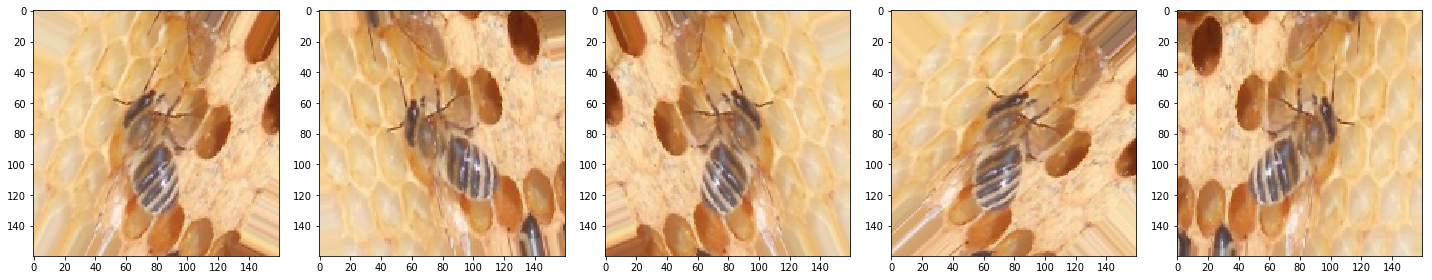

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, 
                                                 directory=validation_set_dir, 
                                                 target_size=(IMAGE_SHAPE, IMAGE_SHAPE),
                                                 class_mode='binary')

Found 40 images belonging to 4 classes.


Model Creation 
https://www.kaggle.com/tianchengli/mnist-with-keras-for-beginners-99457-f2f110

In [0]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMAGE_SHAPE,IMAGE_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
  
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
  
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(6, activation='softmax'))


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 40, 40, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 51200)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 50)               

Train the model

In [0]:
epochs=10


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_training_images / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
   validation_steps=int(np.ceil(total_validation_images / float(BATCH_SIZE)))
)

Epoch 1/10
2/2 [==============================] - 2s 790ms/step - loss: 8.6307e-06 - acc: 1.0000 - val_loss: 6.6172 - val_acc: 0.4750
Epoch 2/10
2/2 [==============================] - 1s 722ms/step - loss: 3.3611e-04 - acc: 1.0000 - val_loss: 6.5880 - val_acc: 0.4750
Epoch 3/10
2/2 [==============================] - 1s 661ms/step - loss: 4.1644e-06 - acc: 1.0000 - val_loss: 6.5641 - val_acc: 0.4750
Epoch 4/10
2/2 [==============================] - 1s 670ms/step - loss: 1.2598e-04 - acc: 1.0000 - val_loss: 6.5283 - val_acc: 0.4750
Epoch 5/10
2/2 [==============================] - 1s 676ms/step - loss: 3.1359e-05 - acc: 1.0000 - val_loss: 6.4957 - val_acc: 0.4750
Epoch 6/10
2/2 [==============================] - 1s 675ms/step - loss: 3.0196e-05 - acc: 1.0000 - val_loss: 6.4716 - val_acc: 0.4750
Epoch 7/10
2/2 [==============================] - 1s 666ms/step - loss: 7.1323e-06 - acc: 1.0000 - val_loss: 6.4520 - val_acc: 0.4750
Epoch 8/10
2/2 [==============================] - 1s 669ms/ste

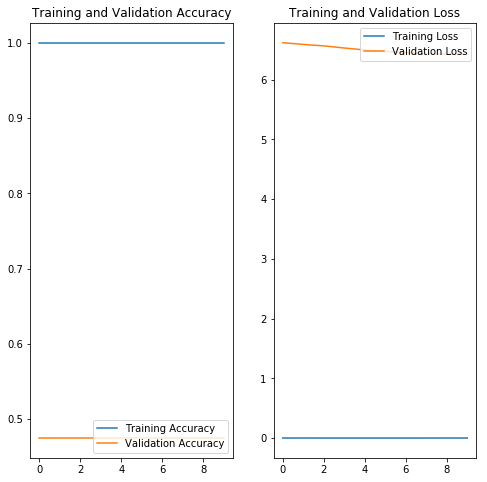

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Making Predictions


Drone Bee


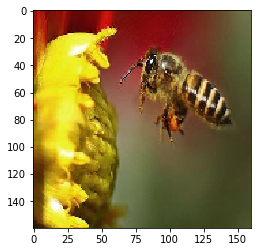

In [0]:
test_image = load_img('gdrive/My Drive/bees/validation_set/worker/worker_bee2.jpg', target_size = (160, 160))
image1 = img_to_array(test_image)
plt.imshow(test_image)

x = np.expand_dims(image1, axis=0)
x1 = preprocess_input(x)
#model.predict(x1)
predict = model.predict(x1)
print(class_names[int(predict[0][0])])
#decoded_predictions = decode_predictions(predict)
#print('Predicted:', decoded_prediction)
#self.assertIn(decoded_prediction[0][0][1], 'tabby')